# Studi Kasus Regresi Data Banjir 

# Data Loading

In [1]:
import pandas as pd
 
df_train = pd.read_csv("train.csv")
df_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


Output kode di atas bahwa data yang kita miliki memiliki 1.117.957 baris dengan 22 kolom. 

# Data Cleaning dan Transformation

In [2]:
# Menampilkan ringkasan informasi dari dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

Periksa tipe data dari masing-masing fitur yang ada di dataset. Tujuan dari pemeriksaan tipe data ini adalah untuk memastikan seluruh tipe data yang ada sudah sesuai dan tidak ada kekeliruan (contoh: data numerik terdeteksi str (string)). Sehingga, pada akhirnya tidak akan mengalami kesulitan ketika melakukan preprocessing data karena tipe data yang ada sudah sesuai dan bisa melalui proses dengan lebih seamless.

### Menampilkan statistik deskriptif dari dataset

In [3]:
df_train.describe(include="all")

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


Melakukan analisis statistik deskriptif dari dataset yang digunakan. Tujuan analisis statistik deskriptif dalam proses data cleaning pada machine learning adalah untuk memahami karakteristik dasar dari data yang sedang diproses. 

In [4]:
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Terakhir, Anda perlu melakukan pemeriksaan terhadap data yang hilang (missing value). Tujuannya untuk mencegah kesalahan ketika melakukan analisis, mencegah error pada model, dan meningkatkan performa model. Dengan melakukan pemeriksaan missing value, Anda dapat memastikan bahwa proses analisis data dan pelatihan model machine learning berjalan dengan baik, sehingga hasil yang diperoleh lebih valid dan akurat. Berikut salah satu contoh kode untuk melakukan pemeriksaan missing value.

### Mengatasi outliers 

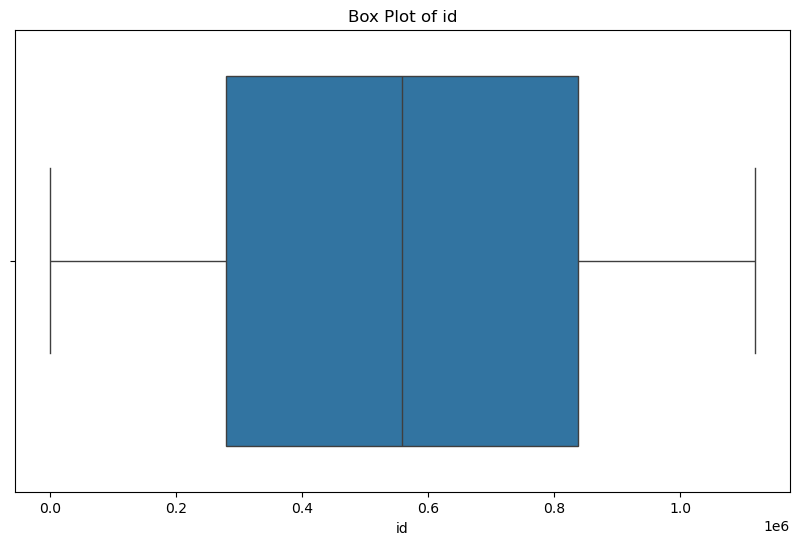

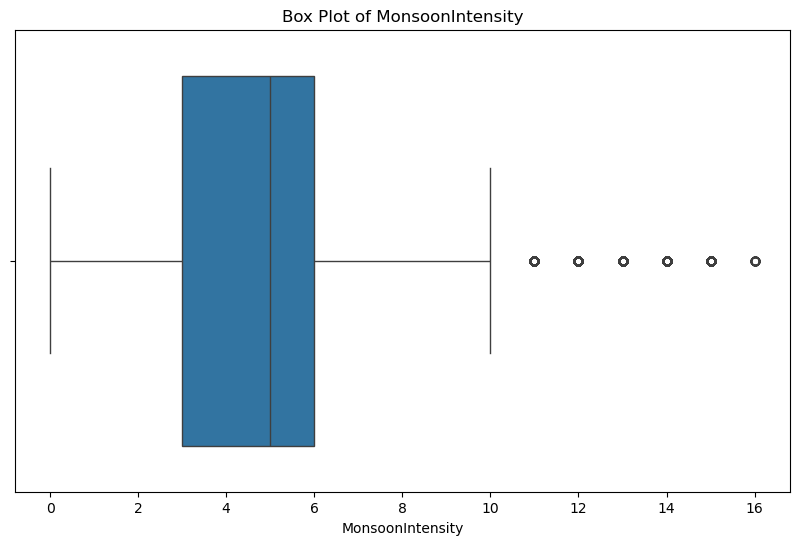

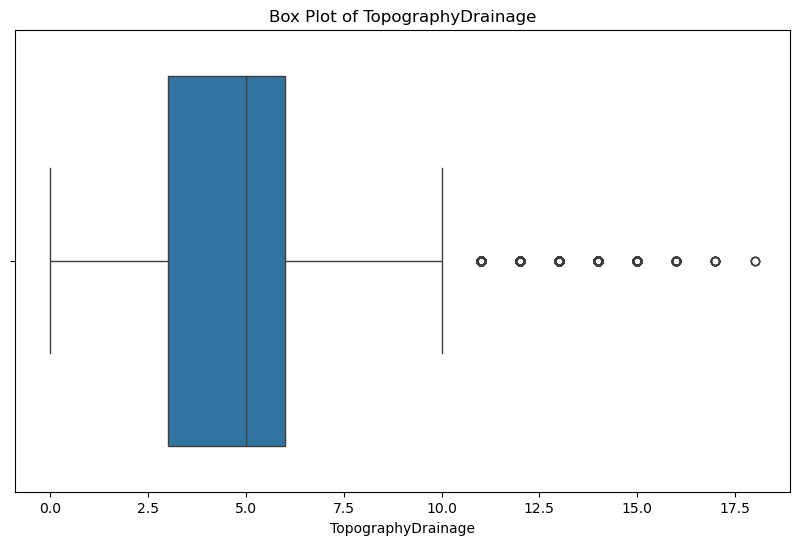

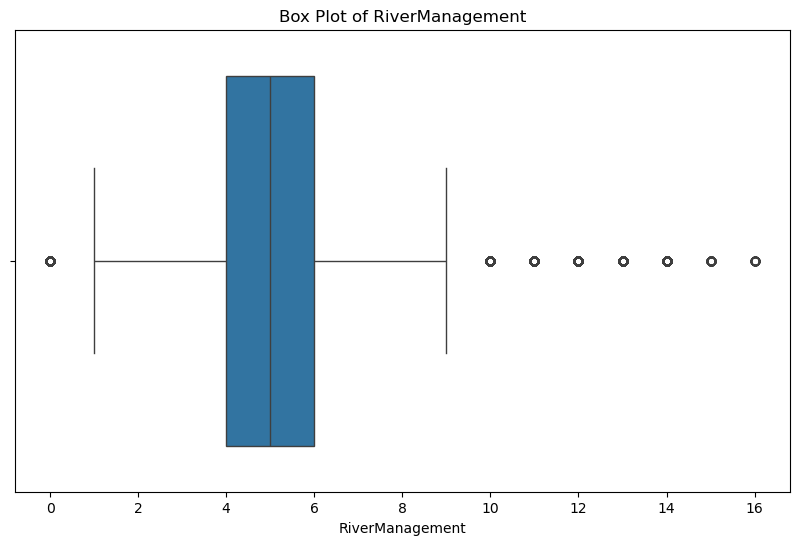

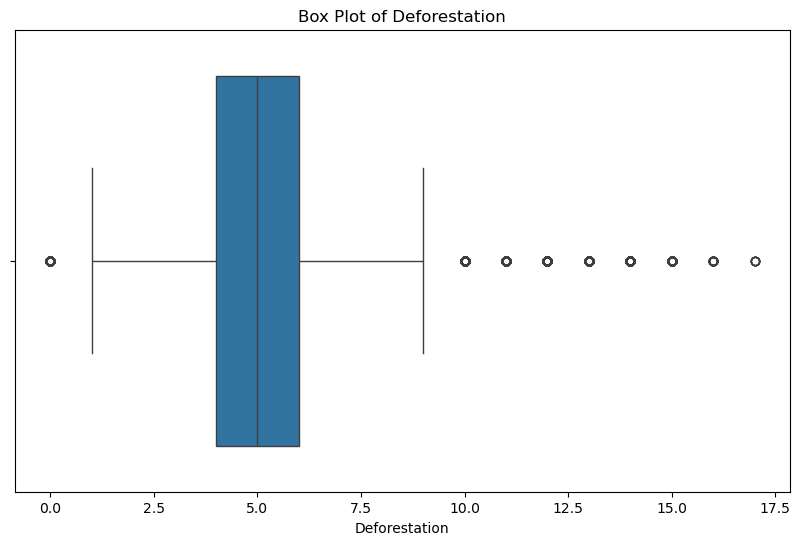

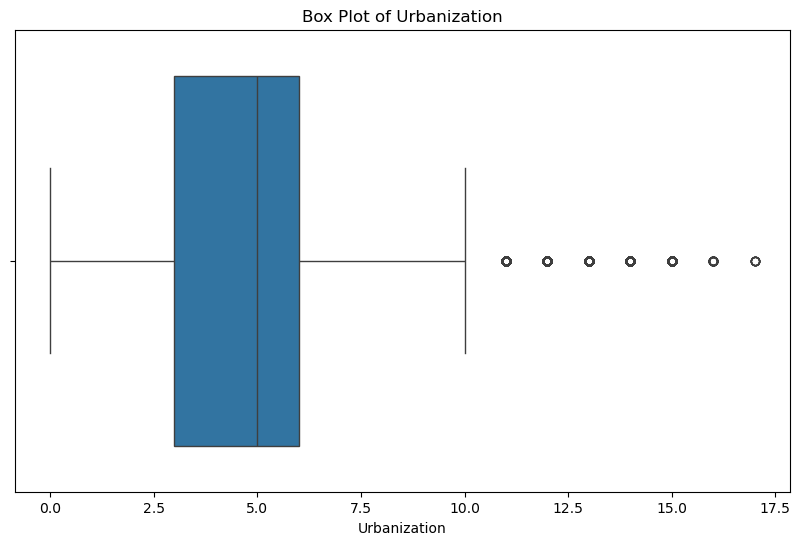

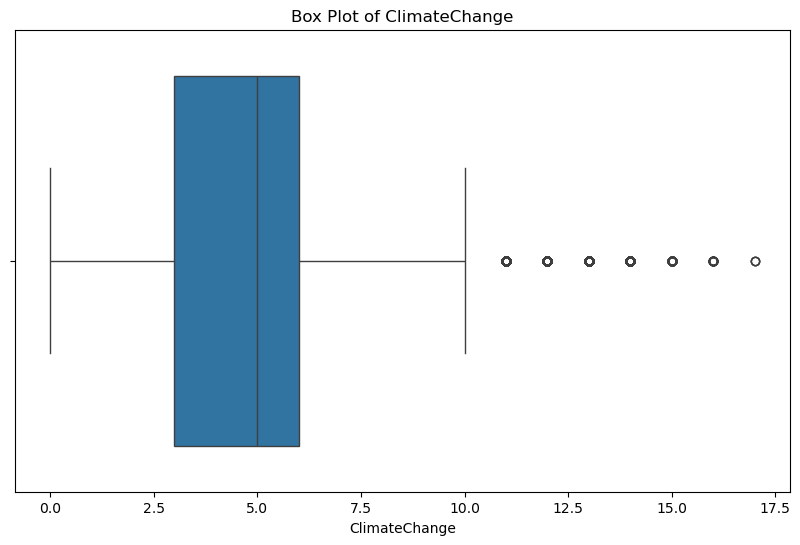

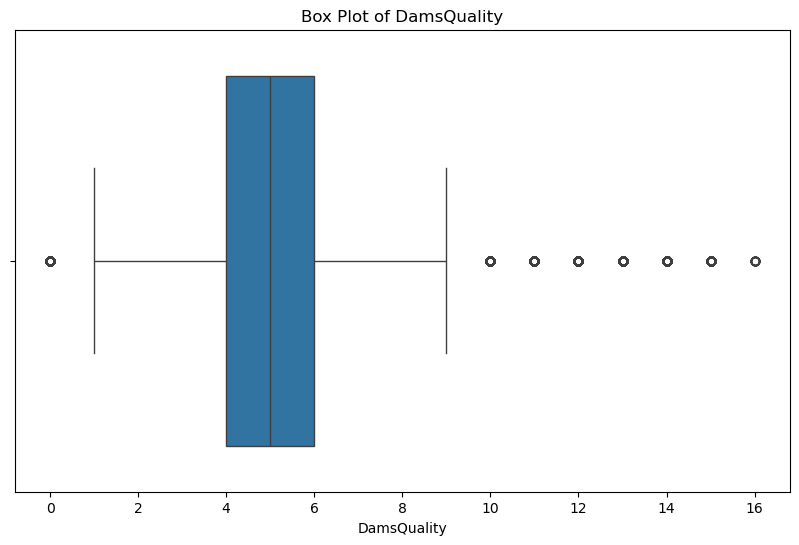

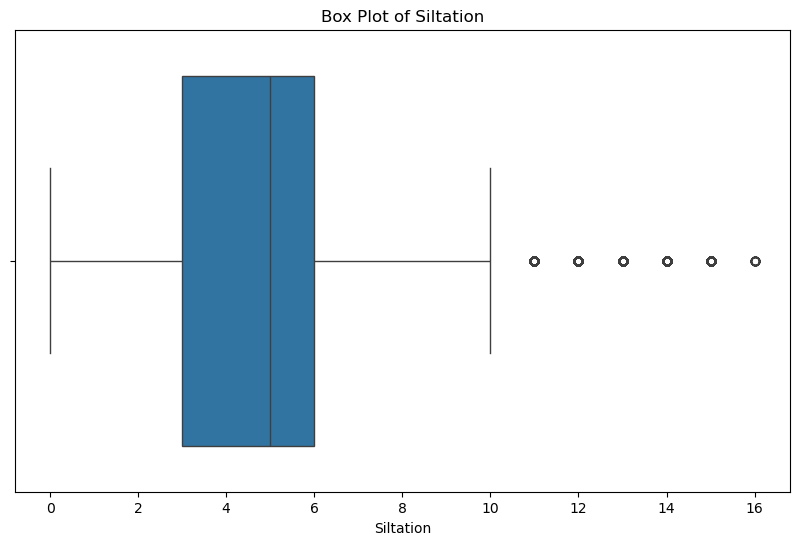

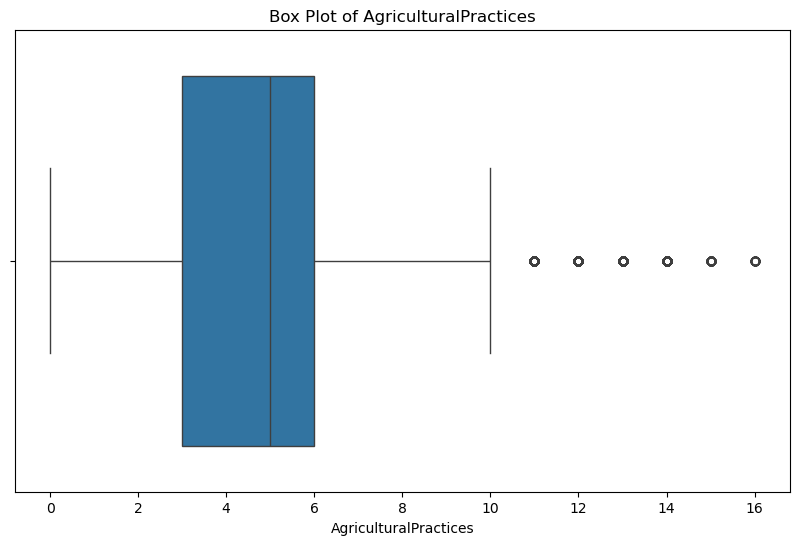

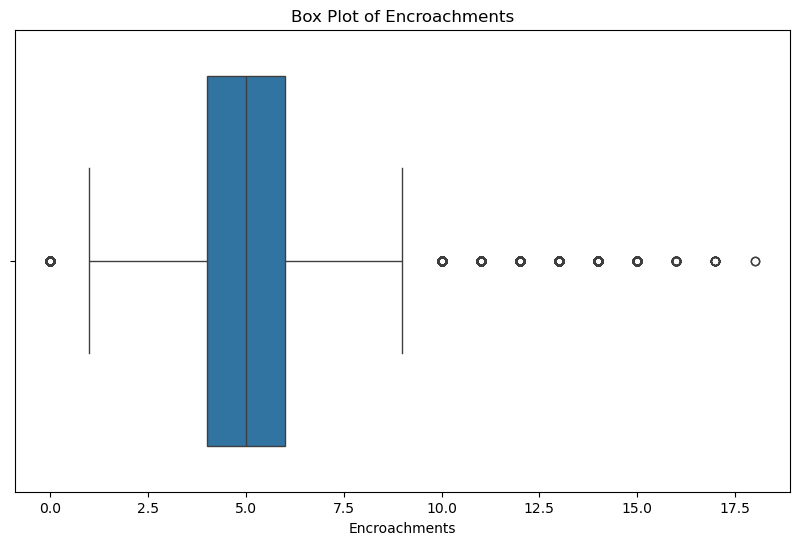

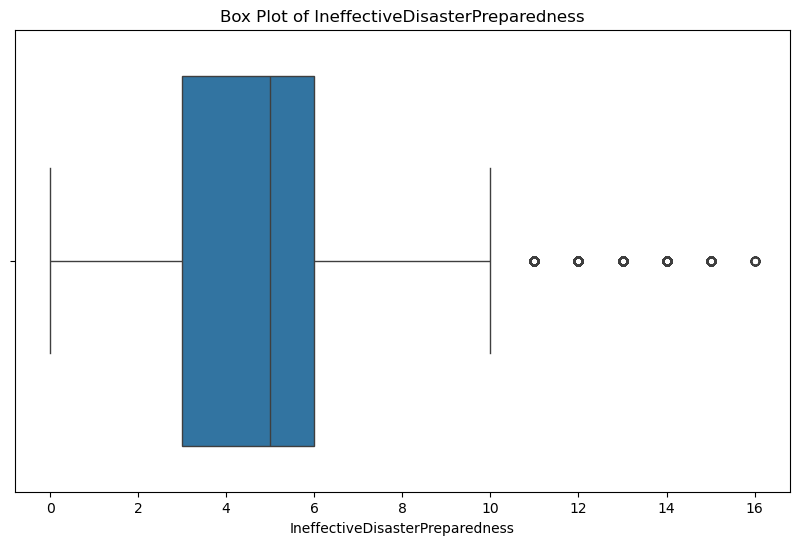

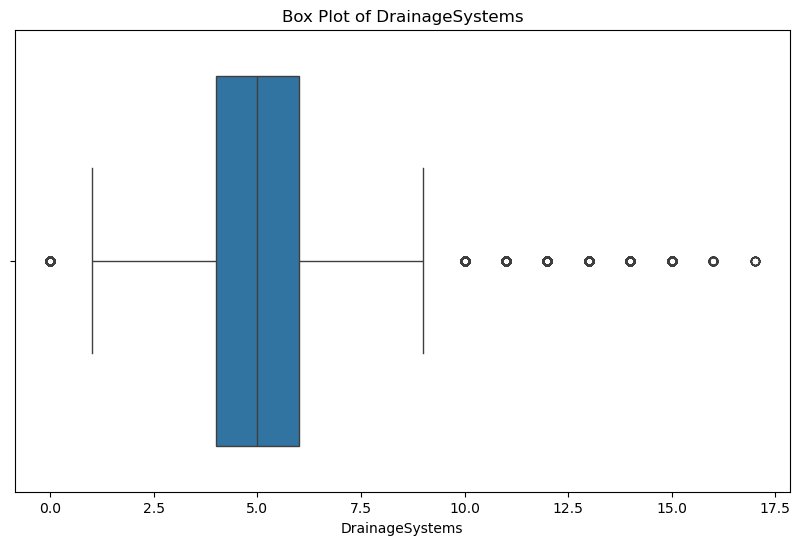

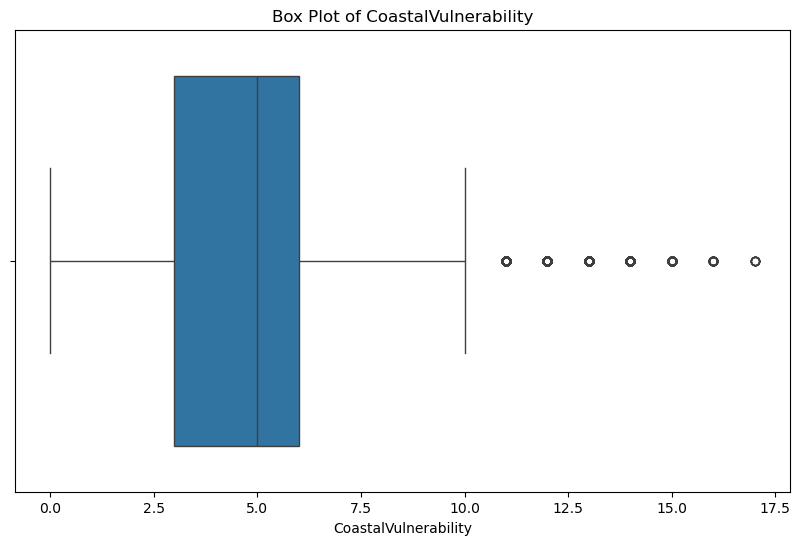

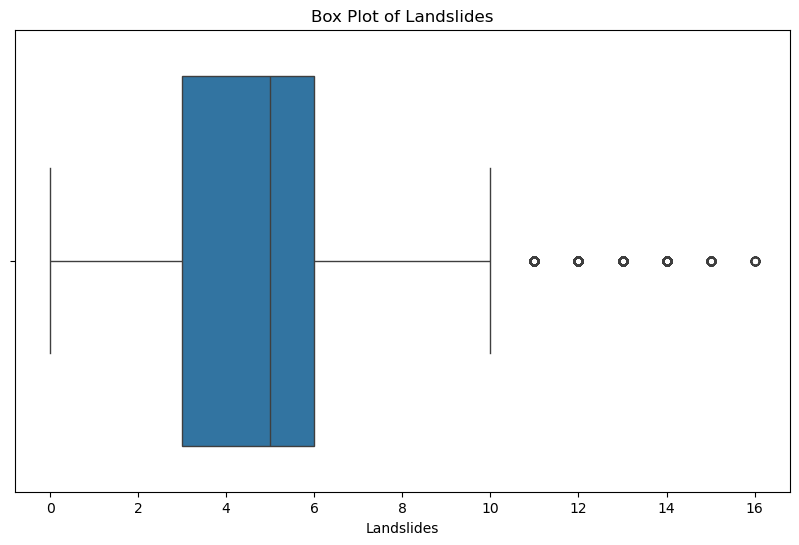

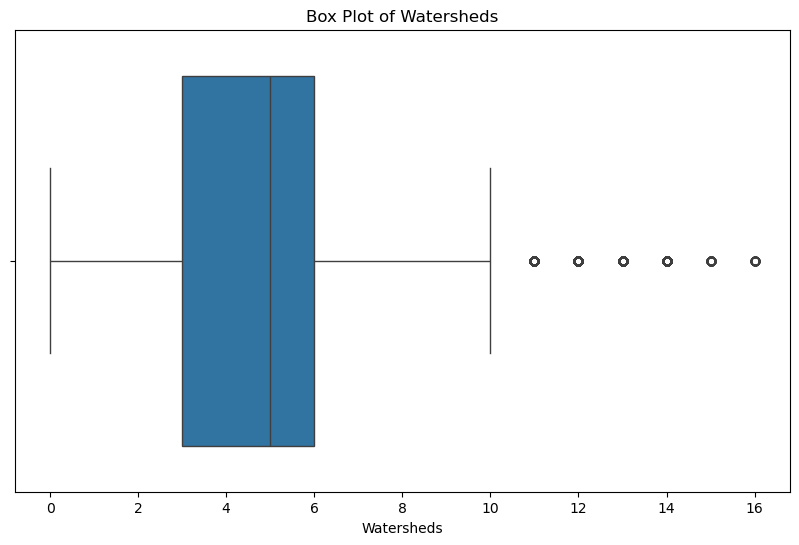

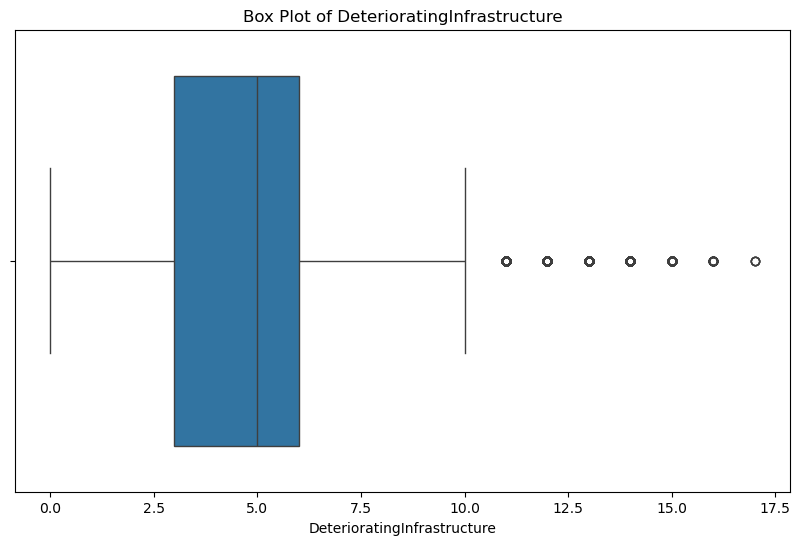

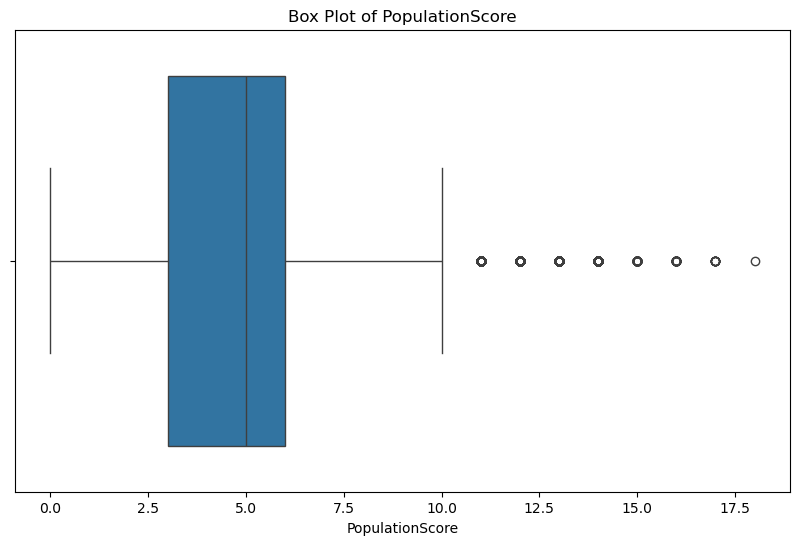

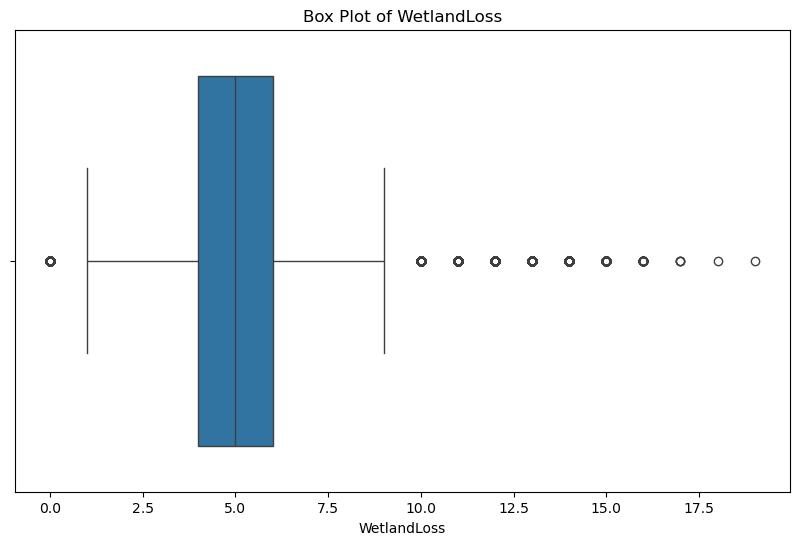

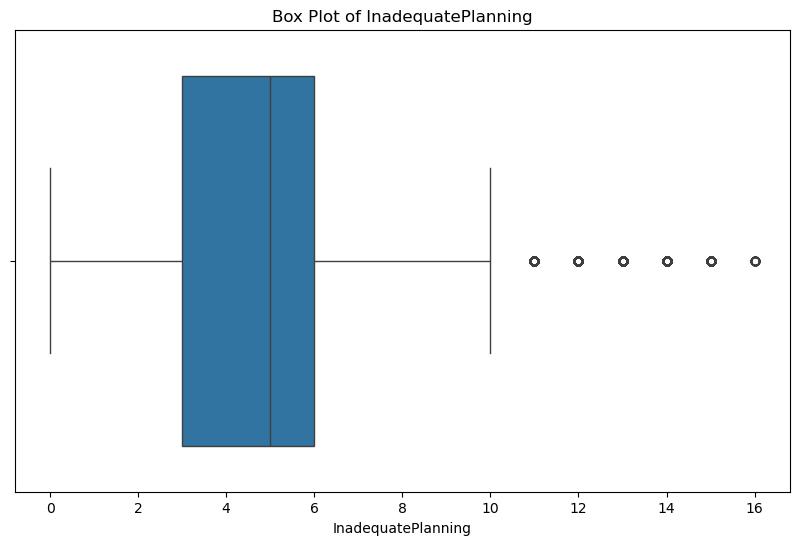

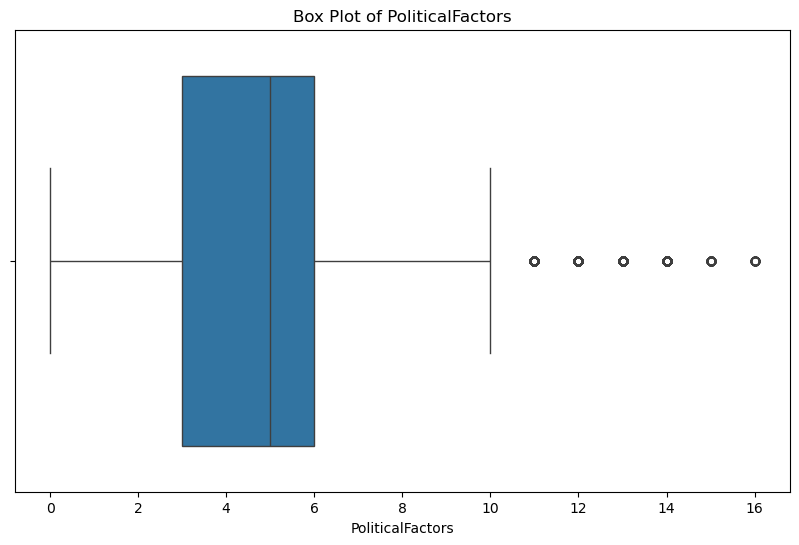

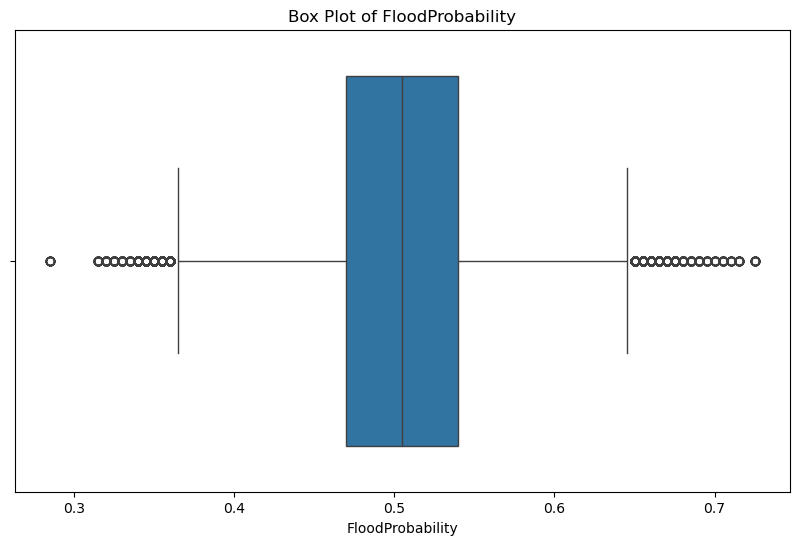

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
for feature in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

Salah satu cara mengatasi outliers adalah dengan menggunakan metode IQR (Interquartile Range) adalah salah satu pendekatan yang efektif. IQR adalah rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3) dalam data. Nilai yang terletak di luar batas IQR dianggap sebagai outlier.

### # Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR

Kita akan memilih untuk menghapus data outlier dengan asumsi bahwa outlier yang terjadi merupakan human error dan tidak ada pengaruh yang besar pada analisis deskriptif. Mari kita mulai pemeriksaan outlier menggunakan metode IQR dengan menggunakan kode berikut.

In [6]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]

# StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler
 
# Memastikan hanya data dengan tipe numerikal yang akan diproses
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features
 
# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Dengan menggunakan kode di atas, Anda dapat mengubah distribusi data sehingga lebih baik dengan nilai standar deviasi kurang lebih mendekati satu.

# Mengidentifikasi baris duplikat

In [8]:
duplicates = df.duplicated()
 
print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [id, MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 22 columns]


Data saat ini sudah tergolong bersih sehingga data ini tidak memiliki duplikasi atau nilai kosong.

#  Exploratory dan Explanatory Data

In [9]:
df.describe(include='all')

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,3.128825e-16,-1.722920e-16,-8.252983e-18,-1.122910e-16,-1.138030e-16,-1.484907e-17,1.193637e-16,1.572309e-16,-1.516197e-17,1.194309e-16,...,-2.232715e-17,-1.108210e-16,-1.940060e-16,-1.644633e-16,-2.222467e-16,5.821188e-17,1.895708e-16,1.429887e-16,-7.076985e-17,-6.328547e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.732268e+00,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-8.661751e-01,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,2.024918e-05,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,8.661002e-01,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,1.732027e+00,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


Data saat ini sudah memiliki distribusi yang cukup baik, hal tersebut dibuktikan dengan standar deviasi yang mendekati satu dan rentang nilai yang sama. 

### Visualisasi Exploratory and Expanatory Data

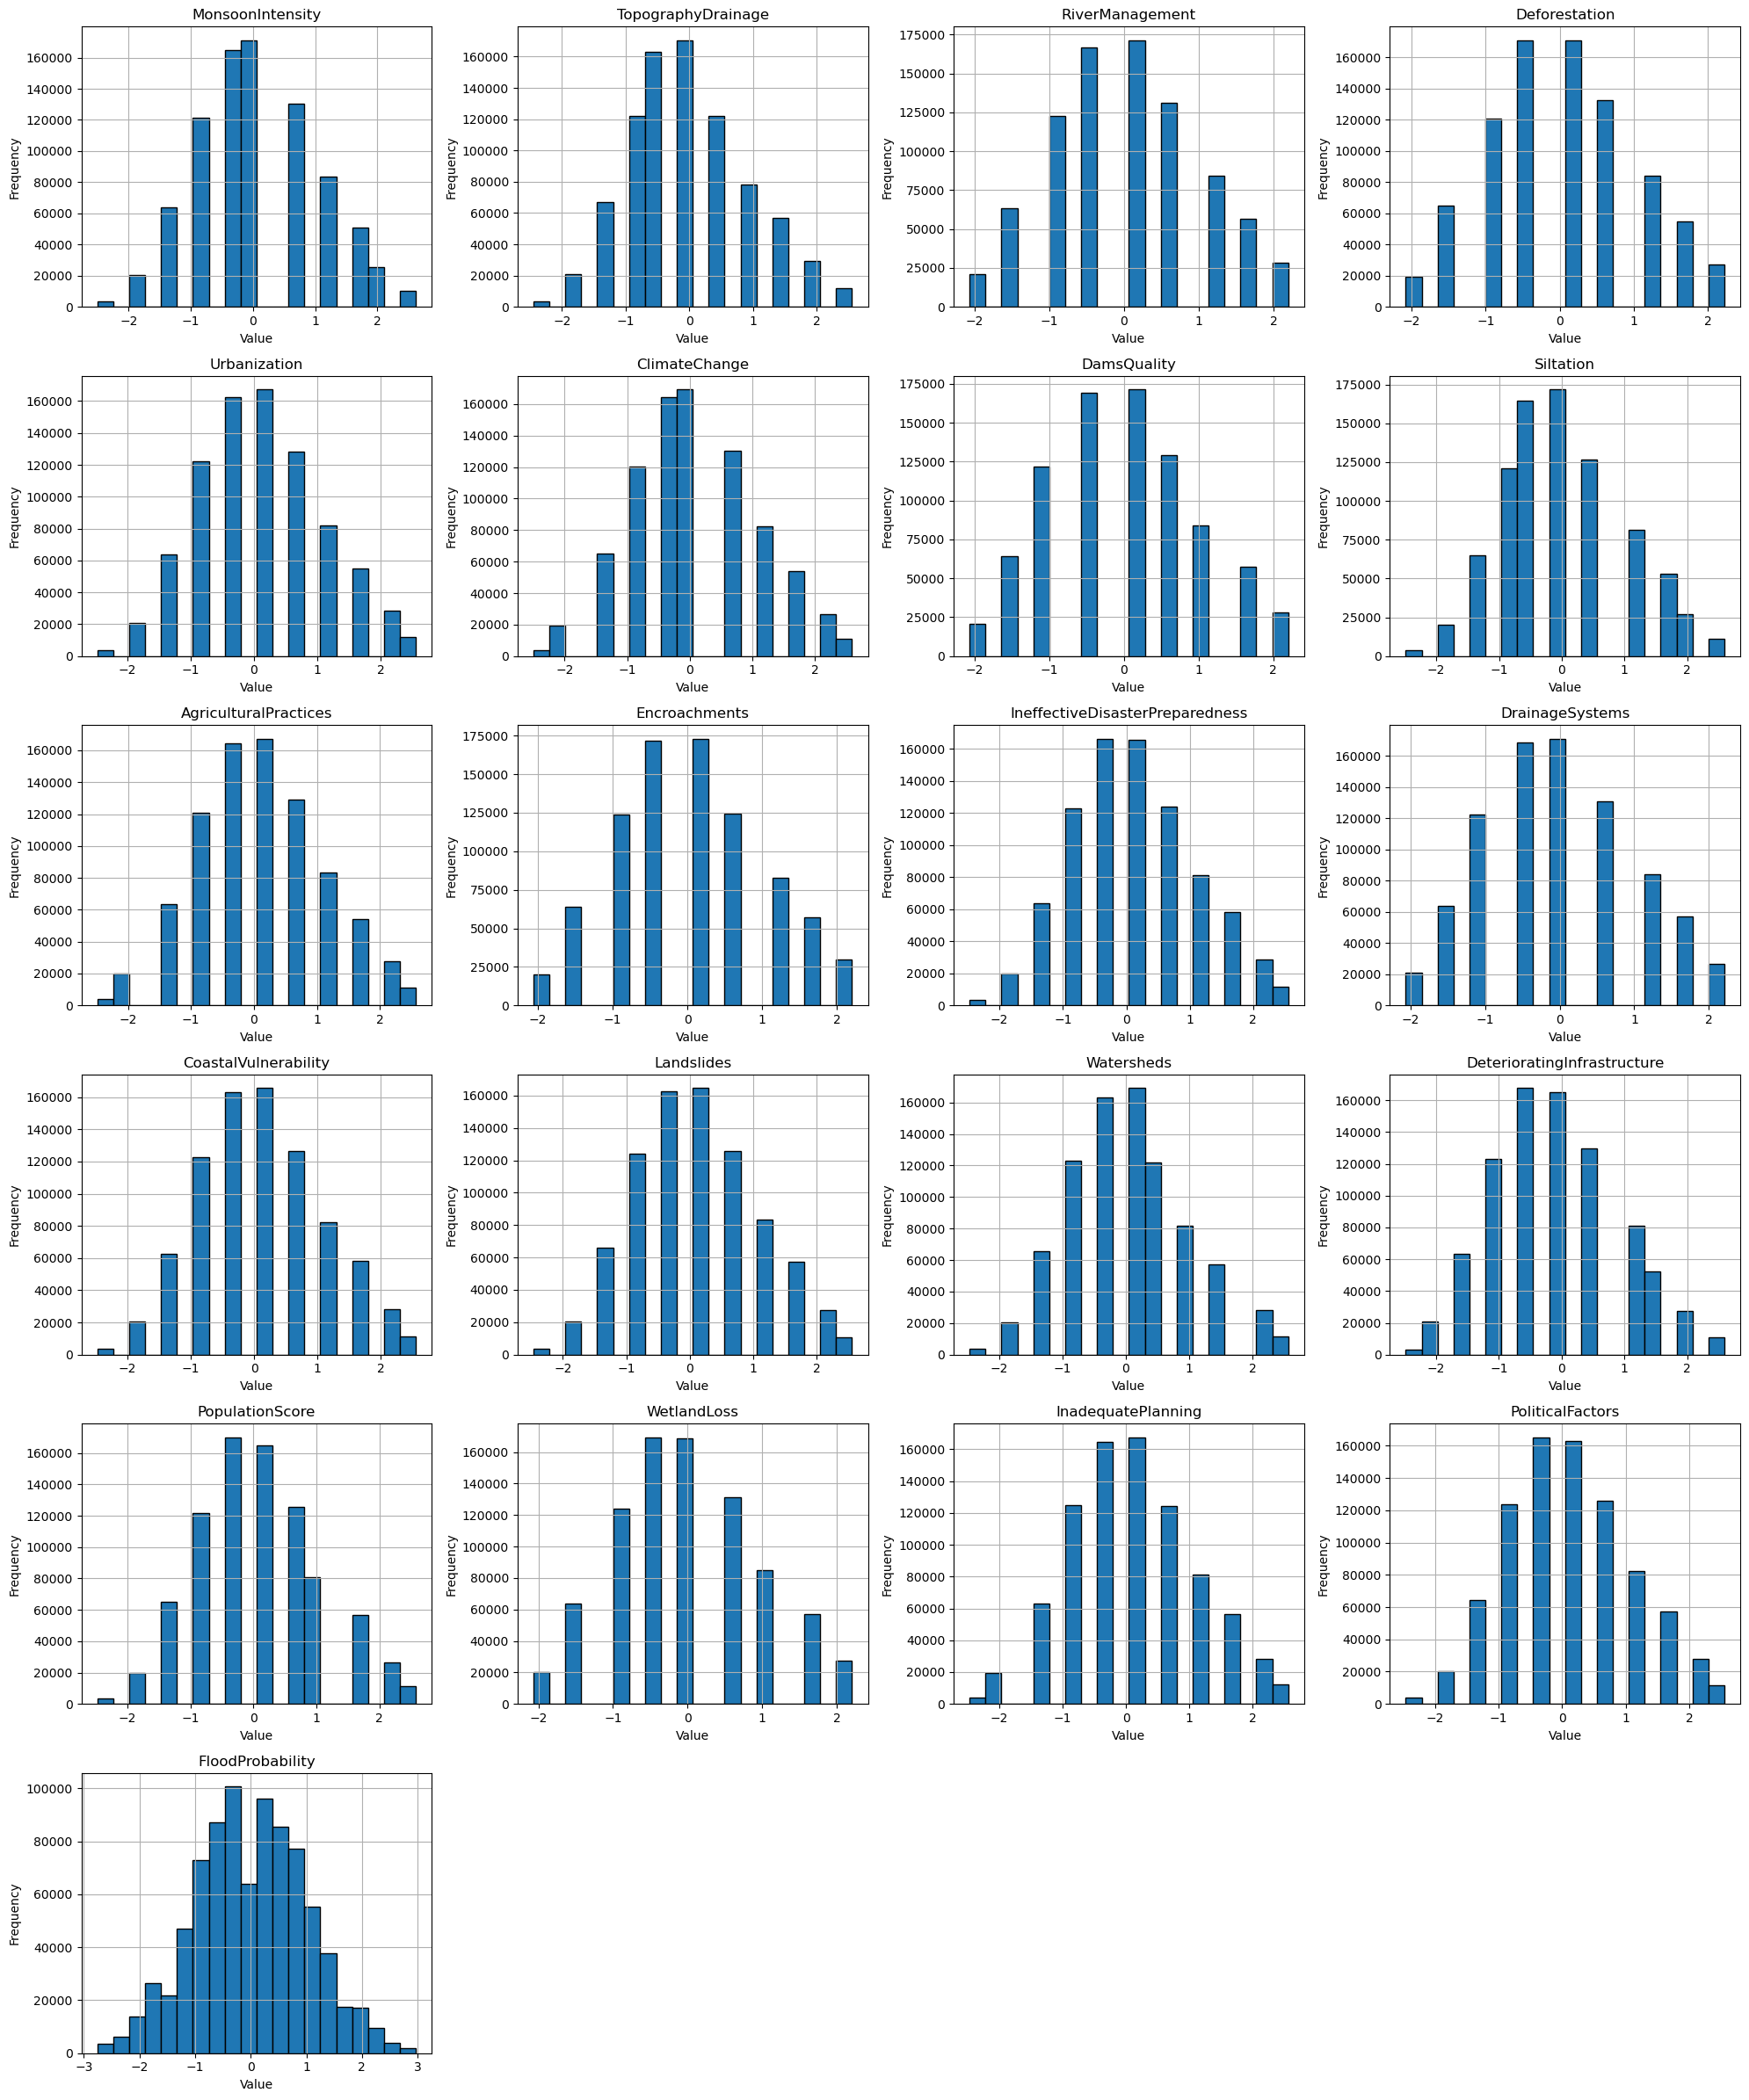

In [11]:
# Menghitung jumlah variabel
num_vars = df.shape[1]
 
# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris
 
# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
 
# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()
 
# Plot setiap variabel
for i, column in enumerate(df.drop(columns=["id"]).columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
 
# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

Standardisasi yang Anda lakukan dapat membantu mengurangi efek bias atau skewness dari data yang tidak merata distribusinya. Dengan menempatkan fitur-fitur dalam skala yang sama, model machine learning lebih mudah untuk menemukan pola yang relevan seperti gambar di atas. Selain itu, ketika variabel-variabel berada pada skala yang berbeda secara signifikan, model machine learning mungkin menjadi tidak stabil dan memberikan hasil yang buruk. Standardisasi mengurangi risiko ini dengan membuat semua variabel berada dalam rentang yang konsisten.

Karena distribusi data yang Anda miliki sudah cukup baik, selanjutnya kita perlu memilih fitur yang memiliki hubungan dengan fitur target atau pada kasus ini adalah FloodProbability. 

### FloodProbability

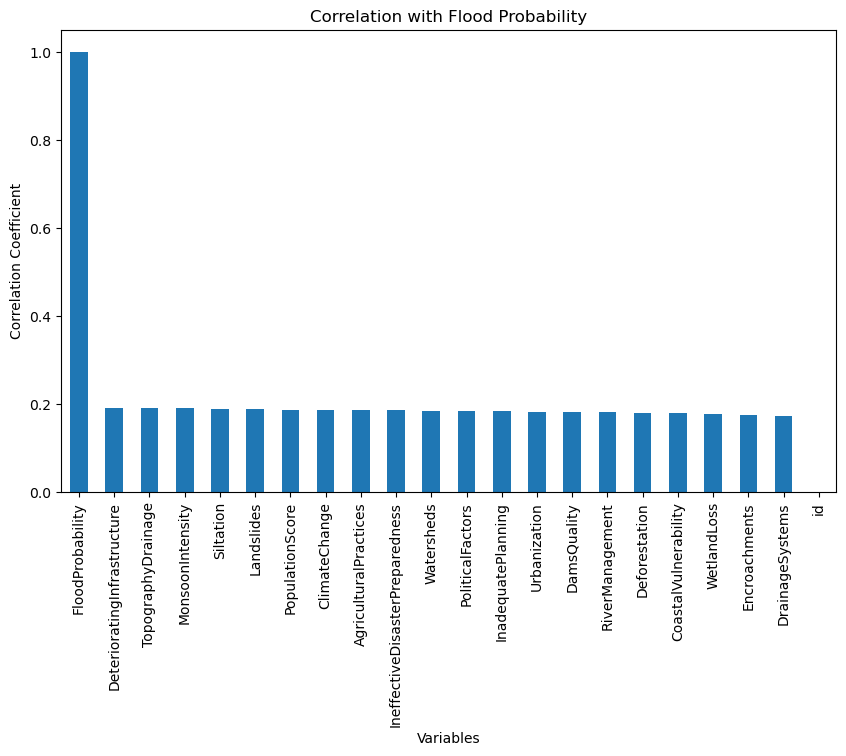

In [12]:
# Menghitung korelasi antara variabel target dan semua variabel lainnya
target_corr = df.corr()['FloodProbability']
 
# (Opsional) Mengurutkan hasil korelasi berdasarkan kekuatan korelasi
target_corr_sorted = target_corr.abs().sort_values(ascending=False)
 
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()


Sekali lagi, data yang kita gunakan pada kasus ini memang sudah dibuat sedemikian rupa sehingga fitur-fitur yang ada memang memiliki hubungan yang sama dengan fitur target. Lalu, apa artinya? Dengan adanya hubungan antara semua fitur dengan target, Anda tidak perlu menghilangkan fitur sehingga dataset ini siap untuk memasuki tahap selanjutnya, yaitu splitting.

Data splitting adalah langkah penting dalam workflow machine learning untuk memastikan bahwa model yang dibangun dapat digeneralisasikan dengan baik pada data yang belum pernah dilihat. Ini dapat menghindari bias evaluasi dan mengoptimalkan model dengan benar, dan memberikan estimasi kinerja yang lebih akurat. Mari kita split data menggunakan kode berikut.

# Split Data

In [13]:
import sklearn
from sklearn import datasets
 
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']
 
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
# menghitung panjang/jumlah data
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(x_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(x_test))

Jumlah data:  845886
Jumlah data latih:  676708
Jumlah data test:  169178


Dari sini kita bisa melihat bahwa dari jumlah data yang digunakan dapat dibagi menjadi dua subset yang berbeda dengan proporsi yang sudah ditentukan. Pada kasus ini kita akan menggunakan 676.708 data latih dan 169.178 data testing.

Dengan begitu data splitting memungkinkan kita untuk mengevaluasi kinerja model secara objektif. Dengan memisahkan data pelatihan dan pengujian, Anda bisa melihat seberapa baik model bekerja pada data yang belum pernah dilihat yang menyimulasikan kondisi dunia nyata. Ini membantu menghindari overfitting sehingga model dapat bekerja dengan sangat baik pada data pelatihan tetapi buruk pada data baru.

Selain itu, dengan membagi data menjadi bagian-bagian yang lebih kecil seperti set pelatihan dan set validasi memungkinkan Anda untuk menyetel hyperparameter model. Set validasi membantu dalam mengoptimalkan model tanpa memengaruhi data pengujian, yang sebaiknya hanya digunakan sekali untuk evaluasi akhir.

Setelah proses data splitting dilakukan langkah berikutnya dalam workflow machine learning adalah modelling. Proses ini melibatkan pelatihan model menggunakan set pelatihan yang telah kita siapkan, dan kemudian mengevaluasi kinerjanya dengan data pengujian atau validasi.

Setelah data terbagi, Anda dapat melatih model menggunakan training set. Model akan belajar dari fitur-fitur yang ada dalam data ini dan mencoba memetakan hubungan antara fitur dan target. Mari kita lakukan modelling atau pelatihan model menggunakan tiga algoritma yang berbeda.

# LARS

In [14]:
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)
 
pred_lars = lars.predict(x_test)

Setelah model dilatih Anda dapat menguji kinerja model pada data validasi. Proses ini penting agar model tidak hanya optimal pada data pelatihan, tetapi juga bekerja dengan baik pada data baru.

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)
 
print(f"MAE: {mae_lars}")
print(f"MSE: {mse_lars}")
print(f"R²: {r2_lars}")

MAE: 0.8064965862112776
MSE: 0.9982455301765446
R²: 0.0007638833508537557


Mari kita bandingkan dengan algoritma lainnya.

Nah, agar Anda dapat membandingkan ketiga model yang akan dibangun, mari kita buat sebuah DataFrame seperti berikut.

In [16]:
# Membuat dictionary untuk menyimpan hasil evaluasi
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}
 
# Konversi dictionary menjadi DataFrame
df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764


Selanjutnya, lakukanlah hal yang sama terhadap algoritma lainnya.

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)
 
pred_LR = LR.predict(x_test)
 
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)
 
print(f"MAE: {mae_LR}")
print(f"MSE: {mse_LR}")
print(f"R²: {r2_LR}")

MAE: 0.3291415589205064
MSE: 0.17129638555662166
R²: 0.8285336323325565


Dari sini sudah terlihat jelas perbedaan performa yang dihasilkan, tetapi untuk membuktikan ini yang terbaik mari kita bandingkan dengan salah satu algoritma lainnya.

In [18]:
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534


# GradientBoostingRegressor

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
 
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)
 
pred_GBR = GBR.predict(x_test)
 
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)
 
print(f"MAE: {mae_GBR}")
print(f"MSE: {mse_GBR}")
print(f"R²: {r2_GBR}")

MAE: 0.5126715936448323
MSE: 0.38049075143226296
R²: 0.6191316771387398


Dari sini, Anda sudah membandingkan beberapa algoritma. Langkah terakhir Anda perlu membandingkan ketiga model dan memilih model dengan performa terbaik.

In [20]:
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.806497,0.998246,0.000764
Linear Regression,0.329142,0.171296,0.828534
GradientBoostingRegressor,0.512672,0.380491,0.619132


Seperti yang dapat Anda lihat pada hasil di atas, algoritma Linear Regression memiliki nilai evaluasi yang lebih baik jika dibandingkan dengan GradientBoostingRegressor. Mengapa hal itu bisa terjadi? Ada beberapa alasan mengapa algoritma Linear Regression dapat bekerja lebih baik daripada GradientBoostingRegressor dalam beberapa kasus meskipun Gradient Boosting adalah algoritma ensemble yang lebih kompleks.

Salah satu alasannya adalah data yang Anda gunakan memiliki hubungan sederhana antara fitur dan target atau bisa disebut linearitas. 

Jika hubungan antara fitur dan target bersifat linear atau hampir linear, Linear Regression mungkin akan bekerja lebih baik. Linear Regression didesain untuk menangani hubungan linear secara optimal dan tidak membutuhkan model yang kompleks untuk menemukan pola tersebut. Sebaliknya, GradientBoostingRegressor adalah model non-linear yang mencoba menangkap pola yang lebih rumit. Jika hubungan antara variabel sangat sederhana dan linear, model ini akan terlalu kompleks (overfitting) dan memberikan hasil yang lebih buruk.

Pada dasarnya, pemilihan algoritma yang tepat sangat bergantung pada karakteristik dataset dan masalah yang sedang dihadapi. Meskipun GradientBoostingRegressor secara teori lebih kuat dan fleksibel, tetapi dalam kasus tertentu Linear Regression bisa menjadi pilihan yang lebih tepat karena kesederhanaan dan kemampuan generalisasi yang lebih baik pada dataset sederhana. So, jangan asal memilih algoritma karena ingin terlihat lebih keren, ya!

Anda telah menempuh perjalanan yang luar biasa dalam memahami regresi pada modul ini. Dimulai dari mengenal dasar-dasar Linear Regression hingga menyelami model-model yang lebih kompleks seperti GradientBoostingRegressor, Anda telah membuka pintu menuju salah satu fondasi paling penting dalam dunia machine learning dan analisis data. Tidak hanya sekadar memahami teori, tetapi Anda juga sudah belajar bagaimana menerapkannya dalam kode, melihat hasilnya, dan mengevaluasi kinerja model.

Satu hal yang pasti: belajar machine learning, khususnya regresi adalah sebuah petualangan yang tak pernah berakhir. Anda tidak hanya belajar pengetahuan baru, tetapi juga cara berpikir yang baru—cara berpikir yang memungkinkan Anda untuk mengubah data menjadi wawasan yang berarti. Itulah yang menjadikan perjalanan ini begitu mengasyikkan dan bermanfaat.

Tetaplah penasaran. Tantang diri Anda dengan proyek baru. Jangan takut untuk membuat kesalahan—itulah bagian dari proses belajar yang sesungguhnya. Setiap percobaan dan latihan membawa Anda lebih dekat kepada keahlian dan pemahaman yang lebih mendalam.